
# <p style="text-align: center;"> <b> Exploring and Pre-processing Data </b></p>
---

## Table of Contents



---

### Import

In [34]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [7]:
df = pd.read_csv('dataset.csv')

df.sample(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
6003,6003,5FBToB2y0ie4fq3WjfsFFE,Sadness,I Want to Be There,I Want to Be with You,41,355474,False,0.144,0.466,...,-6.715,1,0.0522,0.6860,0.4230,0.0764,0.0737,87.290,4,black-metal
59555,59555,2m0UI048bqswNnDh0KZ7nX,Farzad Golpayegani,Six,95,3,209662,False,0.388,0.673,...,-6.223,0,0.0291,0.4460,0.0201,0.1830,0.2090,81.676,4,iranian
10211,10211,41dRg8nPgm974fD7sf9wvl,The Prodigy,The Fat of the Land,Serial Thrilla,45,311333,False,0.498,0.989,...,-5.635,0,0.1660,0.0259,0.5490,0.8880,0.0892,117.695,4,breakbeat
18037,18037,4MxrKIDN1NHlOUDerxpgxE,Katt Williams,Pimp Chronicles Pt.1,Government Is Pimps,28,236904,True,0.654,0.855,...,-13.881,1,0.9370,0.7950,0.0000,0.7470,0.4030,109.825,4,comedy
23225,23225,27ZhKzjHoE0UUlyMXu0ZFa,Klingande,The Album,Jubel,58,283638,False,0.698,0.476,...,-7.459,1,0.0417,0.1850,0.2380,0.0542,0.1810,124.986,4,deep-house


### Drop first column unnamed

In [8]:
df.drop(columns=df.columns[0], axis=1, inplace=True)
df.sample(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
105089,6ovbhJchg5kGdayDjhUV60,PIÑA PINK,Lemonade Waves,Lemonade Waves,47,169090,False,0.694,0.343,8,-12.390,0,0.0463,0.84800,0.82000,0.6260,0.330,85.002,4,study
57337,02tWxsxgRYdquJqB4eT8Rv,Sanah Moidutty,Shyama Meghame (Reprised Version),Shyama Meghame - Reprised Version,50,200295,False,0.748,0.570,6,-9.134,0,0.0530,0.48700,0.00237,0.0629,0.207,99.926,4,indie
38229,4N2yjWLIxZjOXDrCu2VlJe,Arctic Monkeys,Favourite Worst Nightmare,The Bad Thing,59,145213,False,0.550,0.952,2,-3.638,1,0.0750,0.00103,0.00000,0.2570,0.538,111.066,4,garage
11774,7fO6hgP2MnAjVtSxResRw2,Peter And Gordon,Peter And Gordon,A World Without Love,51,164760,False,0.548,0.827,4,-6.197,1,0.0336,0.14700,0.00000,0.1470,0.777,130.043,4,british
4990,2Iq6Tyb3llyf5bXYMotApc,Jean-Michel Blais,Dans ma main,igloo,23,274946,False,0.438,0.389,1,-15.695,0,0.0403,0.88800,0.88500,0.1060,0.230,84.066,4,ambient


### How many rows and columns?

In [9]:
df.shape

(114000, 20)

- Number of rows: 114000

- Number of columns: 20

### What is the meaning of each row?

- A row represents the information of a song(track_name, album_name, artists,...) and some of its properties in Spotify

### Are there duplicated rows?

In [10]:
df.duplicated().sum()

450

- There are 450 duplicated rows

### Drop duplicated rows

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

- There is no duplicated rows

### What is the meaning of each colum?

- `track_id`: The Spotify ID for the track

- `artists`: The artists' names who performed the track. If there is more than one artist, they are separated by a ;

- `album_name`: The album name in which the track appears

- `track_name`: Name of the track

- `popularity`: **The popularity of a track is a value between 0 and 100, with 100 being the most popular**. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.

- `duration_ms`: The track length in milliseconds

- `explicit`: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)

- `danceability`: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable

- `energy`: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

- `key`: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1

- `loudness`: The overall loudness of a track in decibels (dB)

- `mode`: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0

- `speechiness`: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks

- `acousticness`: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic

- `instrumentalness`: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content

- `liveness`: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live

- `valence`: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

- `tempo`: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

- `time_signature`: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.

- `track_genre`: The genre in which the track belongs

### What is the current data type of each column? Are there any columns having inappropriate data types?

In [12]:
df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

There are some inapropriate columns' data types:

- `track_id, artists, album_name, track_name, track_genre` are String

Convert to correct data types

In [13]:
obj_to_str_cols = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

df[obj_to_str_cols] = df[obj_to_str_cols].astype(str)

In [14]:
df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

## 02. Data Distribution

### 02.1.1 Distribution of a numerical column

### 02.1.2 Distribution of a categorical column

- 5 samples of categorical columns

In [15]:
categorical_cols = df[df.columns[(df.dtypes == 'object') | (df.dtypes == 'bool')]]
categorical_cols.sample(5)

,track_id,artists,album_name,track_name,explicit,track_genre
103266,0fFc6B373n7kxHdNewITLQ,The Temptations,Best Christmas Songs 2022,Silent Night,False,soul
104409,1Wrzhfa5bNlqvsnCztz190,Hombres G,Hombres G (Edición 30 Aniversario),Devuélveme a mi chica,False,spanish
68055,3LaQzvfIetBWdtIV0JoBwF,J Balvin;Bad Bunny;Mr Eazi,Feliz Cumpleaños con Perreo,COMO UN BEBÉ,False,latino
5099,1alTFChaR599v3YgjecITE,[Alexandros],TOKYO - HALLOWEEN -,閃光,False,anime
34270,5Y9tt5BF9cjF5tfVoknQxl,Salim–Sulaiman,Dor (Original Motion Picture Soundtrack),Yeh Honsla,False,folk


- The categorical columns consist of 5 object columns and 1 boolean column.
- All are non-null.

In [16]:
categorical_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113550 entries, 0 to 113999
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   track_id     113550 non-null  object
 1   artists      113550 non-null  object
 2   album_name   113550 non-null  object
 3   track_name   113550 non-null  object
 4   explicit     113550 non-null  bool  
 5   track_genre  113550 non-null  object
dtypes: bool(1), object(5)
memory usage: 5.3+ MB


- Missing values = 1

In [83]:
(categorical_cols == 'nan').sum()


track_id       0
artists        1
album_name     1
track_name     1
explicit       0
track_genre    0
dtype: int64

In [84]:
categorical_cols[categorical_cols['track_name'] == 'nan']

,track_id,artists,album_name,track_name,explicit,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,nan,nan,nan,False,k-pop


**These are concise statistics about the columns**
- `count`: the number of values in each column
- `unique`: the number of unique values
- `top`: the most frequently occurring value
- `freq`: the frequency

In [18]:
df.describe(include=['object', 'bool'])

,track_id,artists,album_name,track_name,explicit,track_genre
count,113550,113550,113550,113550,113550,113550
unique,89741,31438,46590,73609,2,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,False,acoustic
freq,9,279,195,151,103832,1000


**Observation:**
- Some tracks have multiple entries, as the count is higher than the unique 
- "The Beatles" is the top artist with a relatively high frequency.
- The top album is "Alternative Christmas 2022" with a frequency of 195.
- "Run Rudolph Run" is the most frequently occurring track.
- The majority of tracks (103,832) are not explicit (lyrics).
- "Acoustic" is the most frequent track genre.

---



## Visualize the data

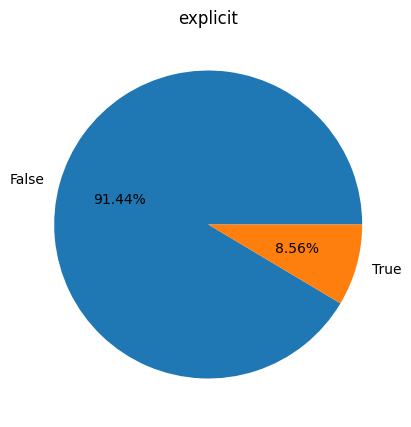

In [19]:
plt.figure(figsize=(5, 5))
plt.title('explicit')
plt.pie(np.unique(categorical_cols['explicit'], return_counts=True)[1], labels=np.unique(categorical_cols['explicit'], return_counts=True)[0], autopct = '%1.2f%%');


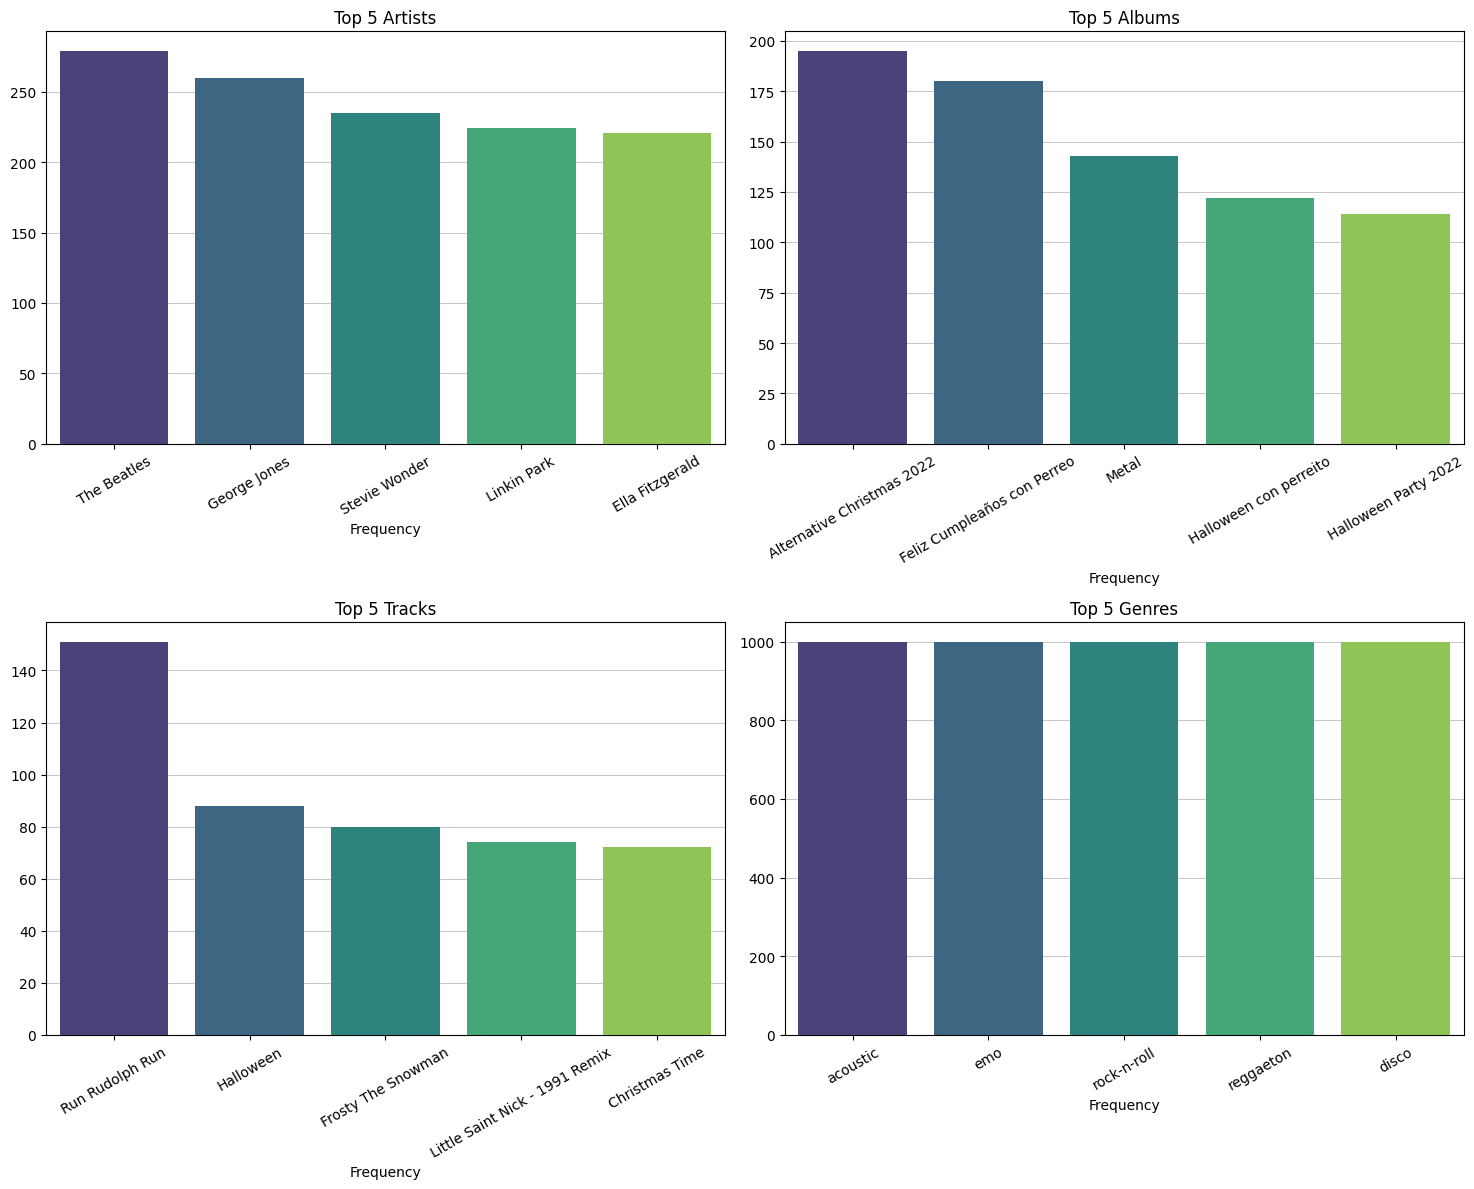

In [91]:
# Assuming df is your DataFrame
top_n = 5

# Get the top N most frequent artists, albums, tracks, and genres
top_artists = df['artists'].value_counts().head(top_n)
top_albums = df['album_name'].value_counts().head(top_n)
top_tracks = df['track_name'].value_counts().head(top_n)
top_genres = df['track_genre'].value_counts().head(top_n)

# Disable FutureWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    # Plotting
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

    # Top N Artists
    sns.barplot(x=top_artists.index, y=top_artists.values, palette="viridis", ax=axes[0, 0], width=0.8,zorder=3)
    axes[0, 0].set_title(f'Top {top_n} Artists')
    axes[0, 0].set_xlabel('Frequency')
    axes[0, 0].tick_params(axis='x', rotation=30)
    axes[0, 0].yaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Albums
    sns.barplot(x=top_albums.index, y=top_albums.values, palette="viridis", ax=axes[0, 1], width=0.8,zorder=3)
    axes[0, 1].set_title(f'Top {top_n} Albums')
    axes[0, 1].set_xlabel('Frequency')
    axes[0, 1].tick_params(axis='x', rotation=30)
    axes[0, 1].yaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Tracks
    sns.barplot(x=top_tracks.index, y=top_tracks.values, palette="viridis", ax=axes[1, 0], width=0.8,zorder=3)
    axes[1, 0].set_title(f'Top {top_n} Tracks')
    axes[1, 0].set_xlabel('Frequency')
    axes[1, 0].tick_params(axis='x', rotation=30)
    axes[1, 0].yaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Genres
    sns.barplot(x=top_genres.index, y=top_genres.values, palette="viridis", ax=axes[1, 1], width=0.8,zorder=3)
    axes[1, 1].set_title(f'Top {top_n} Genres')
    axes[1, 1].set_xlabel('Frequency')
    axes[1, 1].tick_params(axis='x', rotation=30)
    axes[1, 1].yaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    plt.tight_layout()
    plt.show()